<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing Where Do People Drink?  </h1>
<h2>Description</h2>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>1.0 Importing the Data</b>

Load the csv:

In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.

In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:

In [15]:
df.groupby('continent').wine_servings.agg("sum")

continent
Africa            862
Asia              399
Europe           6400
North America     564
Oceania           570
South America     749
Name: wine_servings, dtype: int64

<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [16]:
df.groupby("continent")["beer_servings"].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

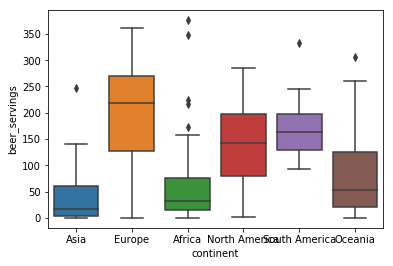

In [18]:
import seaborn as sns
ax = sns.boxplot(x="continent",y="beer_servings",data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.

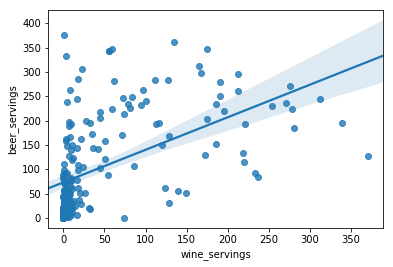

In [19]:
import seaborn as sns 
regplot = sns.regplot(data=df, x="wine_servings",y="beer_servings")


<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [21]:
import numpy as no
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
x = df[["wine_servings"]]
y = df[["total_litres_of_pure_alcohol"]]
lm.fit(x,y)
lm.score(x,y)

0.4456875459787605

### Question 7
Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [25]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

y_data = df[["total_litres_of_pure_alcohol"]]
x_data=df.drop("total_litres_of_pure_alcohol",axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])
lr=LinearRegression()
lr.fit(x_train[["wine_servings","beer_servings","spirit_servings"]],y_train)
print(lr.score(x_test[["wine_servings","beer_servings","spirit_servings"]], y_test))

number of test samples:  39
number of training samples:  154
0.6993287521637523


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
y_data = df[["total_litres_of_pure_alcohol"]]
x_data=df.drop("total_litres_of_pure_alcohol",axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

pr=PolynomialFeatures(degree=3, include_bias=False)
x_train_pr = pr.fit_transform(x_train[["wine_servings","beer_servings","spirit_servings"]])
x_test_pr = pr.fit_transform(x_test[["wine_servings","beer_servings","spirit_servings"]])

lr=LinearRegression()
lr.fit(x_test_pr, y_test)
yhat = lr.predict(x_test_pr)
yhat[0:5]
print("Predicted values:",yhat[0:4])
print("True values:", y_test[0:4].values)
lr.score(x_test_pr, y_test)

number of test samples:  39
number of training samples:  154
Predicted values: [[8.0542337 ]
 [2.71732732]
 [0.36289025]
 [7.61824309]]
True values: [[8.2]
 [2.2]
 [1.7]
 [7.6]]


0.8399499431813391

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [30]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)
print('Predicted:', yhat[0:4])
print('Test Set:', y_test[0:4].values)
RidgeModel.score(x_test_pr, y_test)


Predicted: [[8.54044918]
 [2.58490827]
 [0.6652842 ]
 [8.2486225 ]]
Test Set: [[8.2]
 [2.2]
 [1.7]
 [7.6]]


0.7527209689006485

<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [31]:
pr=PolynomialFeatures(degree=2, include_bias=False)
x_train_pr = pr.fit_transform(x_train[["wine_servings","beer_servings","spirit_servings"]])
x_test_pr = pr.fit_transform(x_test[["wine_servings","beer_servings","spirit_servings"]])


from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)
print('Predicted:', yhat[0:4])
print('Test Set:', y_test[0:4].values)
RidgeModel.score(x_test_pr, y_test)

Predicted: [[8.61101831]
 [2.55441523]
 [0.81799988]
 [7.93332988]]
Test Set: [[8.2]
 [2.2]
 [1.7]
 [7.6]]


0.7305343073360482

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

<b>Sources</b>

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.